# PORTFOLIO OPTIMIZATION


## Monte Carlo Simulation 

We will find the optimal portfolio balance using the Monte Carlo Simulation 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf 
%matplotlib inline 

In [14]:
tickers =[ 'LT.NS', 'ITC.NS', 'TCS.NS', 'SUNPHARMA.NS', 'BAJFINANCE.NS', 'CIPLA.NS',
          'TECHM.NS', 'DABUR.NS','RELIANCE.NS', 'ADANIPORTS.NS']
start = '2017-4-6'
end   = '2022-4-6'

stocks = yf.download(tickers, start, end)
stocks = stocks['Close']
stocks

[*********************100%***********************]  10 of 10 completed


,ADANIPORTS.NS,BAJFINANCE.NS,CIPLA.NS,DABUR.NS,ITC.NS,LT.NS,RELIANCE.NS,SUNPHARMA.NS,TCS.NS,TECHM.NS
Date,,,,,,,,,,
2017-04-06,356.649994,1198.099976,590.299988,284.799988,274.100006,1122.133301,712.496277,686.900024,1200.025024,446.899994
2017-04-07,347.149994,1201.599976,590.000000,282.399994,272.649994,1123.666626,696.696045,665.950012,1214.525024,443.200012
2017-04-10,352.149994,1240.750000,589.650024,286.899994,273.549988,1116.033325,684.189575,667.750000,1211.125000,443.049988
2017-04-11,333.799988,1255.949951,580.049988,289.450012,282.049988,1136.599976,679.731812,670.400024,1209.650024,445.200012
2017-04-12,327.600006,1266.199951,579.400024,288.950012,281.899994,1135.199951,670.643005,683.250000,1196.625000,437.649994
...,...,...,...,...,...,...,...,...,...,...
2022-03-30,767.400024,7251.850098,1028.949951,527.700012,249.199997,1773.599976,2672.949951,920.599976,3731.550049,1496.300049
2022-03-31,774.200012,7259.950195,1018.049988,536.200012,250.649994,1767.650024,2634.750000,914.750000,3739.949951,1499.449951
2022-04-01,785.750000,7408.100098,1014.849976,542.450012,253.300003,1790.099976,2655.850098,908.700012,3758.750000,1487.099976


In [15]:
#calculating the arthmetic mean daily returns 
mean_daily_return = stocks.pct_change().mean()
mean_daily_return

ADANIPORTS.NS    0.000964
BAJFINANCE.NS    0.001807
CIPLA.NS         0.000604
DABUR.NS         0.000648
ITC.NS           0.000108
LT.NS            0.000556
RELIANCE.NS      0.001249
SUNPHARMA.NS     0.000459
TCS.NS           0.001067
TECHM.NS         0.001173
dtype: float64

In [19]:
# Calculating correlation 
stocks.pct_change(). corr()

,ADANIPORTS.NS,BAJFINANCE.NS,CIPLA.NS,DABUR.NS,ITC.NS,LT.NS,RELIANCE.NS,SUNPHARMA.NS,TCS.NS,TECHM.NS
ADANIPORTS.NS,1.000000,0.396643,0.188849,0.261392,0.292953,0.448515,0.360775,0.276139,0.213317,0.304091
BAJFINANCE.NS,0.396643,1.000000,0.134089,0.295726,0.276488,0.480150,0.372601,0.219565,0.172329,0.267448
CIPLA.NS,0.188849,0.134089,1.000000,0.255397,0.184943,0.194166,0.147700,0.467221,0.180047,0.209400
DABUR.NS,0.261392,0.295726,0.255397,1.000000,0.300969,0.310074,0.285705,0.287885,0.198151,0.250440
ITC.NS,0.292953,0.276488,0.184943,0.300969,1.000000,0.352956,0.255396,0.222556,0.190888,0.197206
LT.NS,0.448515,0.480150,0.194166,0.310074,0.352956,1.000000,0.359925,0.257332,0.211628,0.275550
RELIANCE.NS,0.360775,0.372601,0.147700,0.285705,0.255396,0.359925,1.000000,0.252705,0.296727,0.298138
SUNPHARMA.NS,0.276139,0.219565,0.467221,0.287885,0.222556,0.257332,0.252705,1.000000,0.172615,0.268030
TCS.NS,0.213317,0.172329,0.180047,0.198151,0.190888,0.211628,0.296727,0.172615,1.000000,0.473307
TECHM.NS,0.304091,0.267448,0.209400,0.250440,0.197206,0.275550,0.298138,0.268030,0.473307,1.000000


### Simulation of thousands of possible random allocations 

<Axes: xlabel='Date'>

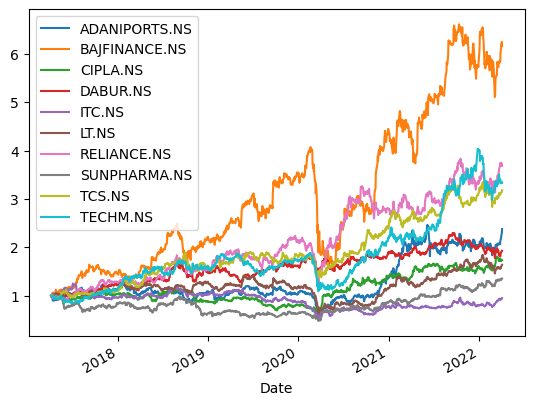

In [22]:
# Normalisation of prices beforehand 
stock_norm = stocks/stocks.iloc[0]
stock_norm.plot()

In [26]:
stock_daily_return = stocks.pct_change(1)
stock_daily_return

,ADANIPORTS.NS,BAJFINANCE.NS,CIPLA.NS,DABUR.NS,ITC.NS,LT.NS,RELIANCE.NS,SUNPHARMA.NS,TCS.NS,TECHM.NS
Date,,,,,,,,,,
2017-04-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-07,-0.026637,0.002921,-0.000508,-0.008427,-0.005290,0.001366,-0.022176,-0.030499,0.012083,-0.008279
2017-04-10,0.014403,0.032582,-0.000593,0.015935,0.003301,-0.006793,-0.017951,0.002703,-0.002799,-0.000339
2017-04-11,-0.052108,0.012251,-0.016281,0.008888,0.031073,0.018428,-0.006515,0.003969,-0.001218,0.004853
2017-04-12,-0.018574,0.008161,-0.001121,-0.001727,-0.000532,-0.001232,-0.013371,0.019168,-0.010768,-0.016959
...,...,...,...,...,...,...,...,...,...,...
2022-03-30,0.007153,0.030187,-0.009530,0.023071,-0.021210,0.015430,0.019218,0.001360,0.007071,-0.017112
2022-03-31,0.008861,0.001117,-0.010593,0.016108,0.005819,-0.003355,-0.014291,-0.006355,0.002251,0.002105
2022-04-01,0.014919,0.020406,-0.003143,0.011656,0.010573,0.012700,0.008008,-0.006614,0.005027,-0.008236


In [20]:
# For better convinience we will use logarithemic returns over arithematic returns for calculations
#calculating log returns:

log_returns = np.log(stocks/ stocks.shift(1))
log_returns.head()

,ADANIPORTS.NS,BAJFINANCE.NS,CIPLA.NS,DABUR.NS,ITC.NS,LT.NS,RELIANCE.NS,SUNPHARMA.NS,TCS.NS,TECHM.NS
Date,,,,,,,,,,
2017-04-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-07,-0.026998,0.002917,-0.000508,-0.008463,-0.005304,0.001366,-0.022425,-0.030974,0.012011,-0.008314
2017-04-10,0.014300,0.032062,-0.000593,0.015809,0.003295,-0.006816,-0.018114,0.002699,-0.002803,-0.000339
2017-04-11,-0.053515,0.012176,-0.016415,0.008849,0.030600,0.018261,-0.006537,0.003961,-0.001219,0.004841
2017-04-12,-0.018749,0.008128,-0.001121,-0.001729,-0.000532,-0.001233,-0.013461,0.018986,-0.010826,-0.017104


In [30]:
# Calculating the annualised mean return where 252 is the total number of trading days in a year 
log_returns.mean() * 252

ADANIPORTS.NS    0.176744
BAJFINANCE.NS    0.371201
CIPLA.NS         0.111890
DABUR.NS         0.133901
ITC.NS          -0.011208
LT.NS            0.100470
RELIANCE.NS      0.266174
SUNPHARMA.NS     0.061628
TCS.NS           0.235992
TECHM.NS         0.245584
dtype: float64

In [32]:
# calculating the covariance of the columns 
log_returns.cov()

# Multiplying the covarince by the number of days 
log_returns.cov() * 252

,ADANIPORTS.NS,BAJFINANCE.NS,CIPLA.NS,DABUR.NS,ITC.NS,LT.NS,RELIANCE.NS,SUNPHARMA.NS,TCS.NS,TECHM.NS
ADANIPORTS.NS,0.133180,0.061384,0.020025,0.023943,0.030767,0.047186,0.042014,0.034036,0.020596,0.036560
BAJFINANCE.NS,0.061384,0.169034,0.015785,0.030431,0.032502,0.057095,0.048980,0.030846,0.018980,0.036841
CIPLA.NS,0.020025,0.015785,0.080146,0.017620,0.014681,0.015800,0.013250,0.043276,0.013103,0.018933
DABUR.NS,0.023943,0.030431,0.017620,0.058633,0.020505,0.021765,0.021825,0.023023,0.012447,0.019632
ITC.NS,0.030767,0.032502,0.014681,0.020505,0.077033,0.028379,0.022771,0.020711,0.013966,0.018032
LT.NS,0.047186,0.057095,0.015800,0.021765,0.028379,0.079699,0.032517,0.024615,0.015867,0.025853
RELIANCE.NS,0.042014,0.048980,0.013250,0.021825,0.022771,0.032517,0.096944,0.026050,0.023991,0.030147
SUNPHARMA.NS,0.034036,0.030846,0.043276,0.023023,0.020711,0.024615,0.026050,0.108232,0.014783,0.028478
TCS.NS,0.020596,0.018980,0.013103,0.012447,0.013966,0.015867,0.023991,0.014783,0.065536,0.038715
TECHM.NS,0.036560,0.036841,0.018933,0.019632,0.018032,0.025853,0.030147,0.028478,0.038715,0.100555


## Single random allocation 

In [40]:
# The stock columns 

print(stocks.columns)


# Creating random weights

print('Random Weights : ')
weights = np.array ( np.random.random (len(tickers)))
print(weights)

#Rebalancing the weights in order for the sum to be equal to 1 
print (' Rebalance to sum = 1 : ')
weights = weights / np.sum(weights)
print(weights)


#Calculating expected returns
expected_returns = np.sum((log_returns.mean() * (weights)) * 252)
print('Expected returns is as follows: ')
print(expected_returns)

#Calculating the expected variance/ volatility 
expected_variance = np.sqrt (np.dot(weights.T , np.dot(log_returns.cov()* 252, weights)))
print('Expected variance/volatility for the portfolio is as follows: ')
print(expected_variance)

#Calculating of the Sharpe Ratio
Sharpe_ratio =  expected_returns / expected_variance 
print('Sharpe ratios if as follows: ' )
print(Sharpe_ratio)

Index(['ADANIPORTS.NS', 'BAJFINANCE.NS', 'CIPLA.NS', 'DABUR.NS', 'ITC.NS',
       'LT.NS', 'RELIANCE.NS', 'SUNPHARMA.NS', 'TCS.NS', 'TECHM.NS'],
      dtype='object')
Random Weights : 
[0.01878143 0.37520996 0.70233189 0.7331369  0.34560687 0.1901704
 0.6459742  0.85939019 0.47964938 0.63453848]
 Rebalance to sum = 1 : 
[0.00376775 0.07527097 0.14089499 0.14707479 0.06933229 0.03815013
 0.12958906 0.1724025  0.09622259 0.12729493]
Expected returns is as follows: 
0.16620801630692028
Expected variance/volatility for the portfolio is as follows: 
0.18061329293850534
Sharpe ratios if as follows: 
0.9202424340024091


### Simulating the portfolio over 20,000 times 

In [45]:
num_ports = 20000

all_weights = np.zeros((num_ports, len(stocks.columns)))
return_arr = np.zeros(num_ports)
variance_arr =  np.zeros(num_ports)
sharpe_arr =  np.zeros(num_ports)


for ind in range (num_ports):
    
    #Create random weights 
    weights = np.array(np.random.random(len(tickers)))
    
    #Rebalancing the weights 
    weights = weights / np.sum(weights)
    
    #Save the weights
    all_weights [ind,:] = weights 
    
    #Calculating expected return
    return_arr[ind] = np.sqrt (np.sum(log_returns.mean() * (weights)) * 252)
    
    #Calculating expected variance 
    variance_arr[ind]= (np.dot(weights.T , np.dot(log_returns.cov()* 252, weights)))
    
    #Calculating Sharpe ratio 
    sharpe_arr[ind]= return_arr[ind]/variance_arr[ind]

In [46]:
GMV_return   = return_arr [variance_arr.argmin()]
GMV_variance = variance_arr[variance_arr.argmin()]

## Plotting the data 

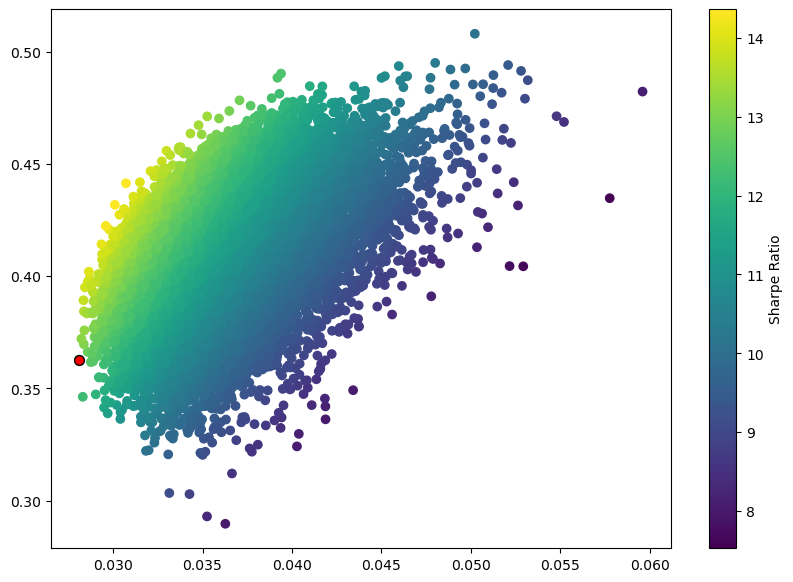

In [50]:
plt.figure(figsize=(10,7))
plt.scatter(variance_arr, return_arr, c = sharpe_arr, cmap = 'viridis')
plt.colorbar (label = 'Sharpe Ratio')
plt.xlabel = ('Variance')
plt.ylabel = ('Returns ')

#adding a red dot at the location of max Sharpe Ratio

plt.scatter(GMV_variance,  GMV_return , c= 'red', s=50, edgecolors = 'black')
plt.savefig('Port_optimisation' , bbox_inches = 'tight')